In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')
df.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


In [3]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [5]:
x=df[['WindSpeed','WindDirection','Gust']].values
y=df['ActivePower'].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
models=[]
models.append(SGDRegressor())
models.append(KNeighborsRegressor())
models.append(RadiusNeighborsRegressor())
models.append(RandomForestRegressor())
models.append(GradientBoostingRegressor())
models.append(XGBRegressor())
models.append(LGBMRegressor())

In [8]:
for i in models:
    i.fit(x_train,y_train)

In [9]:
testval=[]
for i in models:
    testval.append(i.predict(x_test))

c:\program files\python37\lib\site-packages\sklearn\neighbors\_regression.py:366: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


In [10]:
import matplotlib.pyplot as plt

In [12]:
testval[6][157],y_test[157]

(1353.396533543465, 1443.6779789999998)

In [24]:
from sklearn.metrics import mean_squared_error

In [ ]:
#the test dataset is too large for finding out MSE
#Hence we find it for a slice of a dataset

In [27]:
err=[]
for i in testval:
    err.append(mean_squared_error(i[:50],y_test[:50]))
print(err)

[2.6020323596826444e+25, 317824.23934585985, 343476.53553616797, 250530.96990406833, 322731.3167149121, 350190.91777944466, 303683.16157472215]


In [ ]:
#Using Stacking and Voting Techniques in Ensembling

In [37]:
estimators = [('gb', RandomForestRegressor()),('knn', KNeighborsRegressor())]
reg = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor())
reg.fit(x_train,y_train)

StackingRegressor(estimators=[('gb', RandomForestRegressor()),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=GradientBoostingRegressor())

In [41]:
y_pred=reg.predict(x_test)
mean_squared_error(testval[3][200:250],y_test[200:250])

12661.726080089915

In [43]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('rf',RandomForestRegressor()), ('lgbm',LGBMRegressor())])
er.fit(x_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('lgbm', LGBMRegressor())])

In [46]:
y_pred=er.predict(x_test)
mean_squared_error(y_pred[100:150],y_test[100:150])

67100.5042915646

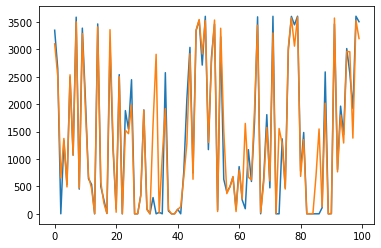

In [48]:
#comparing the voting technique
plt.plot(y_test[0:100])
plt.plot(y_pred[0:100])
plt.show()

In [58]:
er.predict([[5.31,100.64,0],[5.31,272.64,0],[5.771,259.64,0.442]])

array([419.32271357, 344.52347159, 453.57262431])

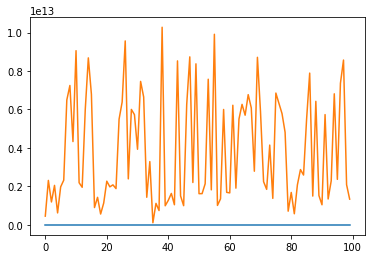

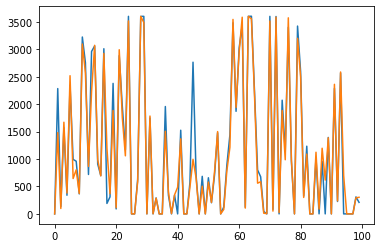

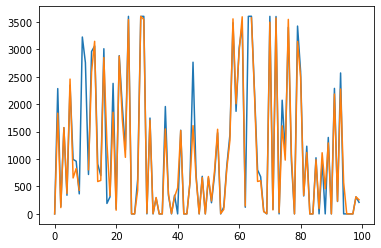

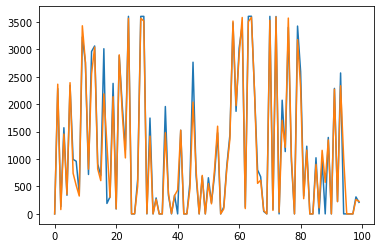

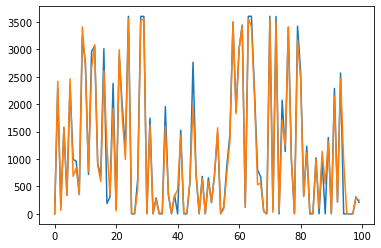

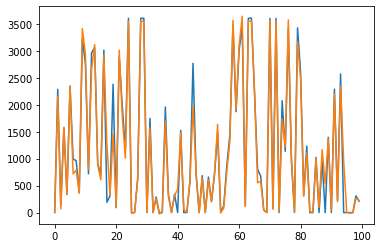

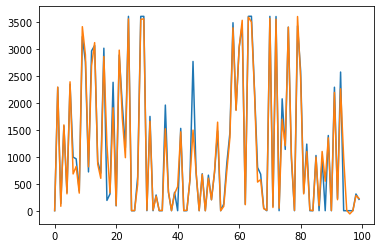

In [59]:
#comparing trends of all the algorithms
for i in testval:
    plt.plot(y_test[100:200])
    plt.plot(i[100:200])
    plt.show()

In [60]:
#RFR gives better accuracy for some slices where as Voting Regressor gives better accuracy for other slices
# no technique is hyperparameter tuned yet

In [69]:
#hyperparameter tuning completed

In [61]:
rfr=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=900)

In [63]:
y_pred=rfr.predict(x_test)

In [66]:
mean_squared_error(y_pred[0:50],y_test[0:50])

279739.4216469906

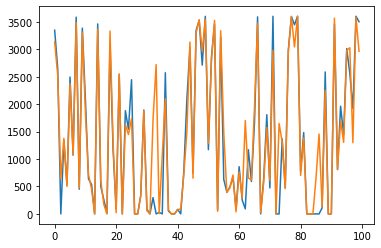

In [70]:
#Before Hyperparameter tuning
plt.plot(y_test[0:100])
plt.plot(testval[3][0:100])
plt.show()

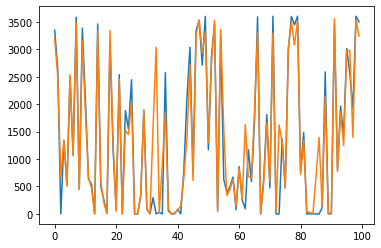

In [71]:
#After hyperparameter tuning
plt.plot(y_test[0:100])
plt.plot(y_pred[0:100])
plt.show()

In [72]:
y1=rfr.predict(x_train[:100])

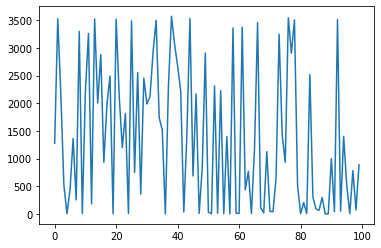

In [74]:
plt.plot(y1)
#plt.plot(y_train[0:100])
plt.show()

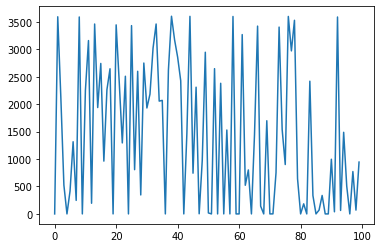

In [75]:
#plt.plot(y1)
plt.plot(y_train[0:100])
plt.show()